Using deno kernel for typescript code

In [1]:
import { DOMParser, SVGElement } from "npm:linkedom";
//import pl from "npm:nodejs-polars";
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";
//import { document } from "jsr:@ry/jupyter-helper";
//import * as d3 from "npm:d3";
//import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";
//import * as t from "https://unpkg.com/tabulator-tables@5.5.0/dist/js/tabulator.js"
import { Tabulator } from "https://esm.sh/tabulator-tables@5.5.0";
// Section 1: Define TSV data and parse it
const tsvData = `field1	field2	label
10	20	A
15	25	B
20	30	C`;

const [header, ...rows] = tsvData.trim().split("\n");
const columns = header.split("\t");
const records = rows.map(line => {
  const values = line.split("\t");
  return Object.fromEntries(values.map((v, i) => [columns[i], isNaN(v) ? v : Number(v)]));
});
const document = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"><body><div id="table-render"></div></body></html>`,
  "text/html",
);
// Section 2: Render table using Tabulator for interactive UI
// Load Tabulator CSS
// const tabulatorCSS = document.createElement("link");
// tabulatorCSS.rel = "stylesheet";
// tabulatorCSS.href = "https://unpkg.com/tabulator-tables@5.5.0/dist/css/tabulator.min.css";
// document.head.appendChild(tabulatorCSS);

// // Create container for the table
// const container = document.createElement("div");
// container.id = "table-render";
// container.style.height = "300px";
// document.body.appendChild(container);

// Load Tabulator JS and initialize table
// const tabulatorScript = document.createElement("script");
// tabulatorScript.src = "https://unpkg.com/tabulator-tables@5.5.0/dist/js/tabulator.min.js";
// tabulatorScript.onload = () => {
  // @ts-ignore

const table = new Tabulator("#table-render", {
    data: records,
    layout: "fitColumns",
    columns: columns.map(col => ({ title: col, field: col, sorter: "number", headerFilter: true })),
  });
// };
//document.head.appendChild(tabulatorScript);
// console.log(document.documentElement.outerHTML);
//await display(document.documentElement)
//await display({"text/html":document});
await Deno.jupyter.display({
  "text/html": document.documentElement.outerHTML,
  }, { raw: true });

In [2]:
import * as JavaScript from "https://deno.land/x/jupyter/mod.ts";

const html_code = `
    <link href="https://unpkg.com/tabulator-tables@5.5.0/dist/css/tabulator.min.css" rel="stylesheet">
    <script src="https://unpkg.com/tabulator-tables@5.5.0/dist/js/tabulator.min.js"></script>
    <div id="example-table"></div>
    <script>
        document.addEventListener("DOMContentLoaded", function() {
            new Tabulator("#example-table", {
                data: [{ id: 1, name: "Alice" }, { id: 2, name: "Bob" }],
                columns: [
                    { title: "ID", field: "id" },
                    { title: "Name", field: "name" }
                ]
            });
        });
    </script>
`;

JavaScript.display(html_code);

TypeError: Module not found "https://deno.land/x/jupyter/mod.ts".

In [1]:
import { widget } from "jsr:@anywidget/deno";

const model = widget({
	state: { letters: "abcd" },
	imports: `import * as d3 from "https://esm.sh/d3";`,
	render: ({ model, el }) => {
		const width = 300;
		const svg = d3.create("svg")
			.attr("width", width)
			.attr("height", 33)
			.attr("viewBox", `0 -20 ${width} 33`);
		model.on("change:letters", () => {
			const t = svg.transition().duration(200);
			svg.selectAll("text")
				.data(model.get("letters"), (d) => d)
				.join(
					(enter) =>
						enter.append("text")
							.attr("fill", "green")
							.attr("x", (d, i) => i * 16)
							.attr("y", -30)
							.text((d) => d)
							.call((enter) =>
								enter.transition(t)
									.attr("y", 0)
							),
					(update) =>
						update
							.attr("fill", "black")
							.attr("y", 0)
							.call((update) =>
								update.transition(t)
									.attr("x", (d, i) => i * 16)
							),
					(exit) =>
						exit
							.attr("fill", "brown")
							.call((exit) =>
								exit.transition(t)
									.attr("y", 30)
									.remove()
							),
				);
		});
		el.appendChild(svg.node());
	},
});

model;


Failed to find anywidget frontend version: NotFound: The system cannot find the path specified. (os error 3): readfile 'C:\Users\raiser\AppData\Roaming\jupyter\labextensions\anywidget\package.json': The system cannot find the path specified. (os error 3): readfile 'C:\Users\raiser\AppData\Roaming\jupyter\labextensions\anywidget\package.json': The system cannot find the path specified. (os error 3)


In [11]:
let dict = await Deno.readTextFile("words.txt");
for (let word of dict.split("\n")) {
	model.set("letters", word);
	await new Promise((resolve) => setTimeout(resolve, 500));
}


In [12]:
import "https://cdn.jsdelivr.net/npm/p5@1.9.4/lib/p5.js";

const sketch = (p: any) => {
  let x = 0;
  let y = 0;
  let speed = 2;
  let color: [number, number, number] = [0, 0, 0];

  p.setup = () => {
    p.createCanvas(800, 400);
    x = p.width / 2;
    y = p.height / 2;
  };

  p.draw = () => {
    p.background(220);
    p.fill(color);
    p.ellipse(x, y, 50, 50);
    if (p.keyIsDown(p.LEFT_ARROW) === true) {
      x -= speed;
    }

    if (p.keyIsDown(p.RIGHT_ARROW) === true) {
      x += speed;
    }

    if (p.keyIsDown(p.UP_ARROW) === true) {
      y -= speed;
    }

    if (p.keyIsDown(p.DOWN_ARROW) === true) {
      y += speed;
    }
  };

  p.mousePressed = () => {
    color = [p.random(255), p.random(255), p.random(255)];
  };
};

new p5(sketch);


ReferenceError: window is not defined

In [ ]:
import { document } from "jsr:@ry/jupyter-helper";
import * as Plot from "npm:@observablehq/plot";
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";
import { DOMParser, SVGElement } from "npm:linkedom";

// // Section 1: Define TSV data and parse it
// const tsvData = `No	Description	u.m.	Formula	Amount (Lei)
// 1	Valoare facturată fără TVA	Lei		622.96
// 2	Total bază de impozitare TVA	Lei		1261.27
// 3	TVA (19%)	Lei	3=2*19%	239.64
// 4	Valoare factură curentă	Lei	4=1+3	862.60
// 5	Sold la data emiterii facturii (facturi restante sau credit)	Lei		304.02
// 6	Total de plată	Lei	6=4+5	1166.62
// 7	Consum energie activă	kWh		1200.00
// 8	Preț final facturat			
// `;
const tsvData = `field1	field2	label
10	20	A
15	25	B
20	30	C`;
//define &name as variable and use it as *name in code
//define &name[+5:+5] as table and use it as *name in code

const [header, ...rows] = tsvData.trim().split("\n");
const columns = header.split("\t");
const records = rows.map(line => {
  const values = line.split("\t");
  return Object.fromEntries(values.map((v, i) => [columns[i], isNaN(v) ? v : Number(v)]));
});

// Section 2: Load Grid.js for tabular rendering with sorting and pagination
const gridCSS = document.createElement("link");
gridCSS.rel = "stylesheet";
gridCSS.href = "https://cdn.jsdelivr.net/npm/gridjs/dist/theme/mermaid.css";
document.head.appendChild(gridCSS);

const gridScript = document.createElement("script");
gridScript.src = "https://cdn.jsdelivr.net/npm/gridjs/dist/gridjs.umd.js";
console.log("columns", columns);
console.log("records", records);
gridScript.onload = () => {
  // @ts-ignore
  new gridjs.Grid({
    columns,
    data: records.map(r => columns.map(col => r[col])),
    sort: true,
    pagination: {
      enabled: true,
      limit: 5
    }
  }).render(document.body);
};
//console.log("gridScript", gridScript);
document.head.appendChild(gridScript);
document.body.innerHTML = "<b>hello</b> world";
// Section 2: Interpret records with formulas (e.g., compute result = field1 + field2)
//const computedRecords = records.map(r => ({ ...r, result: r.field1 + r.field2 }));
// Plot.plot({
//   marks: [
//     Plot.dot(computedRecords, {
//       x: "field1",
//       y: "result",
//       fill: "label"
//     })
//   ],
//   document,
// });
// console.log(document.body);
// console.log(document.body.innerHTML);
const document1 = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);
await display({
  "text/markdown":
    "Get ready for **denotebooks**! ![](https://github.com/denoland.png?size=32)",
});
await display({
  "text/txt":
    "<h1>Get ready for <em>denotebooks</em>!</h1>salut",raw:true
});


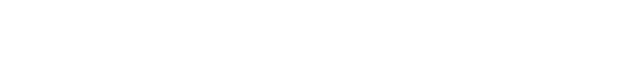

In [14]:
import * as d3 from "npm:d3";
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";
import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";
const width = 500;
const height = 500;
const canvas = createCanvas(width, height);
import { DOMParser, SVGElement } from "npm:linkedom";
import * as Plot from "npm:@observablehq/plot";
const document = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);


  const table = d3.create("table");
  const tbody = table.append("tbody");
  tbody.append("tr").append("td").text("First!");
  tbody.append("tr").append("td").text("Second.");
  tbody.append("tr").append("td").text("Third.");
  table.node();

await display(Plot.plot({document}));

In [ ]:
const vegaLiteSpec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    "values": [
      {"a": "A", "b": 28}, {"a": "B", "b": 55}, {"a": "C", "b": 43},
      {"a": "D", "b": 91}, {"a": "E", "b": 81}, {"a": "F", "b": 53},
      {"a": "G", "b": 19}, {"a": "H", "b": 87}, {"a": "I", "b": 52}
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "a", "type": "nominal", "axis": {"labelAngle": 0}},
    "y": {"field": "b", "type": "quantitative"}
  }
}

displayVegaLite(vegaLiteSpec)